In [17]:
import pickle
import numpy as np

In [29]:
sizes = []
means = []
stds = []
testscores = []
for i in range(1000):
    try:
        with open("rfsmall{0}.pickle".format(i), "rb") as f:
            size, scores, test = pickle.load(f)
        sizes.append(size)
        means.append(np.mean(scores[0][2]))
        stds.append(np.std(scores[0][2]))
        testscores.append(test)
    except:
        pass

In [33]:
with open("learningcurve.pickle", "wb") as f:
    pickle.dump([sizes, means, stds, testscores], f)

In [34]:
with open("learningcurve.pickle", "rb") as f:
    sizes, means, stds, testscores = pickle.load(f)

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

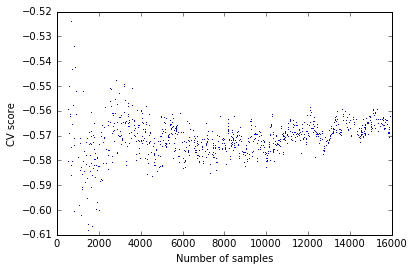

In [36]:
fig, ax = plt.subplots()
ax.plot(sizes, means, marker=',', linestyle="")
ax.set_xlabel('Number of samples')
ax.set_ylabel('CV score')

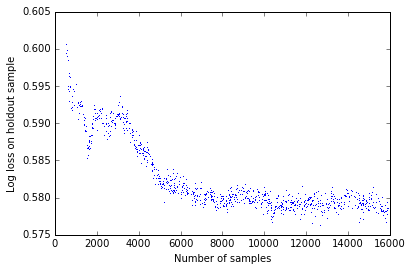

In [37]:
fig, ax = plt.subplots()
ax.plot(sizes, testscores, marker=',', linestyle="")
ax.set_xlabel('Number of samples')
ax.set_ylabel('Log loss on holdout sample')

<Container object of 3 artists>

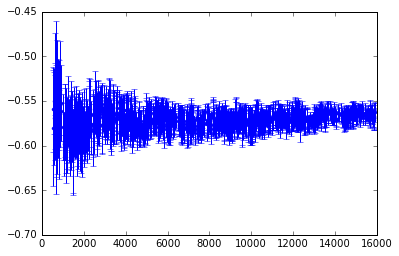

In [26]:
fig, ax = plt.subplots()
ax.errorbar(sizes, means, yerr=stds, fmt='.')